Text(0.5, 0.98, 'Grey Scale Images')

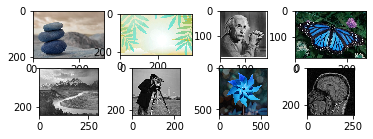

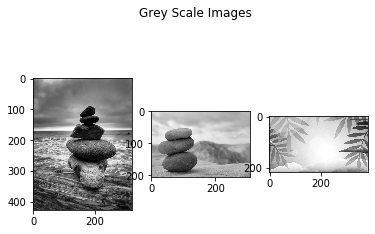

In [1]:
#2.1: Load Images as GreyScale and RGB Image

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

folder= "images\\"

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images


# img1=cv2.imread("C:\\Users\\ssc\\Desktop\\CV Assignemnt\\images\\01.JPG", 1)
# img2=cv2.imread("C:\\Users\\ssc\\Desktop\\CV Assignemnt\\images\\02.JPG", 1)
# img3=cv2.imread("C:\\Users\\ssc\\Desktop\\CV Assignemnt\\images\\03.PNG", 1)
# plt.imshow(img1)

all_images=[]
all_images = load_images_from_folder(folder)

l=len(all_images)

if l>1:
    for i in range (1,l):
        plt.subplot(l/2, l/2, i)
        plt.imshow(all_images[i])
else:
    plt.imshow(all_images[0])

    
plt.figure()
#  Read in Grey Scale   
img1 = cv2.imread("images\\01.jpg", 0)
img2 = cv2.imread("images\\02.jpg", 0)
img3 = cv2.imread("images\\03.png", 0)
plt.subplot(1,3,1)
plt.imshow(img1, cmap='Greys_r')
plt.subplot(1,3,2)
plt.imshow(img2, cmap='Greys_r')
plt.subplot(1,3,3)
plt.imshow(img3, cmap='Greys_r')
plt.suptitle('Grey Scale Images')

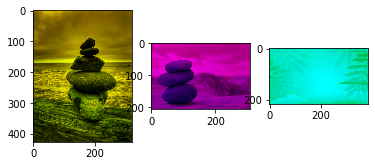

In [2]:
#2.2 rgbExclusion()

import rgbExclusion
img1 = cv2.imread("images\\01.jpg", 1)
img2 = cv2.imread("images\\02.jpg", 1)
img3 = cv2.imread("images\\03.png", 1)

# pass the color name you want to exclude in image
# red= "r";   blue= "b";   Green= "g"
final_img1=rgbExclusion.exclude_color(img1, "r") #red channel excluded
final_img2=rgbExclusion.exclude_color(img2, "g") #green channel excluded
final_img3=rgbExclusion.exclude_color(img3, "b") #blue channel excluded


plt.subplot(1,3,1)
plt.imshow(final_img1)
plt.subplot(1,3,2)
plt.imshow(final_img2)
plt.subplot(1,3,3)
plt.imshow(final_img3)




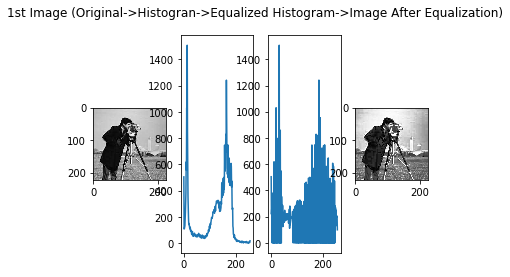

In [3]:
#2.3: Histogram Equalization on 3 Images
#Image: 1

img_grey1 = cv2.imread("images\\06.jpeg", 0)

plt.suptitle ('1st Image (Original->Histogran->Equalized Histogram->Image After Equalization)')
plt.subplot (1,4,1)
plt.imshow(img_grey1, cmap='Greys_r')


plt.subplot(1,4,2)
hist = cv2.calcHist([img_grey1],[0],None,[256],[0,256])
plt.plot(hist)

eq_img=cv2.equalizeHist(img_grey1) 

plt.subplot(1,4,3)
eq_hist = cv2.calcHist([eq_img],[0],None,[256],[0,256])
plt.plot(eq_hist)


plt.subplot (1,4,4)
plt.imshow(eq_img, cmap='Greys_r')

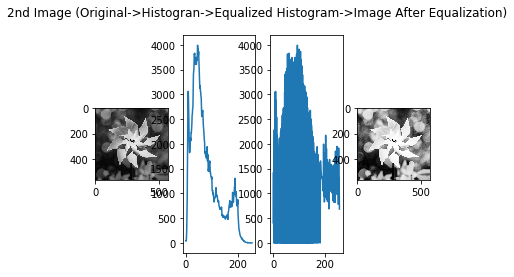

In [4]:
#2.3: Histogram Equalization on 3 Images
#Image: 2

img_grey2 = cv2.imread("images\\07.jpg", 0)

plt.suptitle ('2nd Image (Original->Histogran->Equalized Histogram->Image After Equalization)')
plt.subplot (1,4,1)
plt.imshow(img_grey2, cmap='Greys_r')


plt.subplot(1,4,2)
hist = cv2.calcHist([img_grey2],[0],None,[256],[0,256])
plt.plot(hist)

eq_img=cv2.equalizeHist(img_grey2) 

plt.subplot(1,4,3)
eq_hist = cv2.calcHist([eq_img],[0],None,[256],[0,256])
plt.plot(eq_hist)


plt.subplot (1,4,4)
plt.imshow(eq_img, cmap='Greys_r')

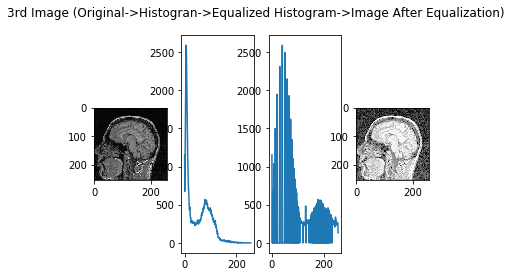

In [5]:
#2.3: Histogram Equalization on 3 Images
#Image: 3

img_grey3 = cv2.imread("images\\08.jpg", 0)

plt.suptitle ('3rd Image (Original->Histogran->Equalized Histogram->Image After Equalization)')
plt.subplot (1,4,1)
plt.imshow(img_grey3, cmap='Greys_r')


plt.subplot(1,4,2)
hist = cv2.calcHist([img_grey3],[0],None,[256],[0,256])
plt.plot(hist)

eq_img=cv2.equalizeHist(img_grey3) 

plt.subplot(1,4,3)
eq_hist = cv2.calcHist([eq_img],[0],None,[256],[0,256])
plt.plot(eq_hist)


plt.subplot (1,4,4)
plt.imshow(eq_img, cmap='Greys_r')


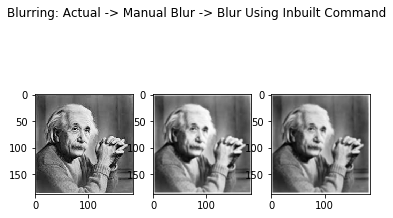

In [6]:
#2.4(Blurring):  function to compare the manual concolution to Inbuilt
#Gaussian Blurring (sharpening filter comparison on next segment)


import convo

img_grey = cv2.imread("images\\04.jpg", 0)


#blur kernels, use any one. One is 3x3, other is 5x5
#K = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16      #3x3 Blur Kernel
K = np.array([[1, 4, 7, 4, 1], [4, 16, 26, 16, 4], [7, 26, 41, 26, 7], [4, 16, 26, 16, 4],[1, 4, 7, 4, 1]])/273    #5x5 Blur Kernel


manual_blur=convo.convolute(img_grey, K)
auto_blurred= cv2.GaussianBlur(img_grey,(5,5),0)

plt.suptitle ('Blurring: Actual -> Manual Blur -> Blur Using Inbuilt Command')
plt.subplot (1,3,1)
plt.imshow(img_grey, cmap='Greys_r')    #Actual Image
plt.subplot (1,3,2)     
plt.imshow(manual_blur, cmap='Greys_r')    #Manually Blurred Image
plt.subplot (1,3,3)     
plt.imshow(auto_blurred, cmap='Greys_r')    #Blurred Using Inbuilt Command




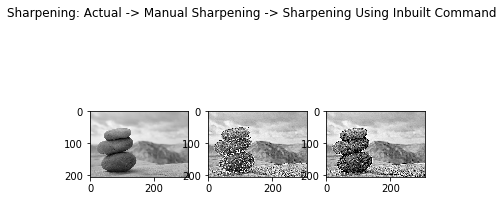

In [7]:
#2.4 (Sharpening):  function to compare the manual convolution to Inbuilt
# Convolution for Sharpening an image

import convo

img_grey = cv2.imread("images\\02.jpg", 0)


#Sharpening kernel, max value is given to central pixel:
K= np.array([[-1,-1,-1],[-1, 9,-1],[-1,-1,-1]])

manual_sharp=convo.convolute(img_grey, K)  #using code wriiten from scratch
auto_sharpened= cv2.filter2D(img_grey, -1, K) #Using Inbuilt Convolution Code

plt.suptitle ('Sharpening: Actual -> Manual Sharpening -> Sharpening Using Inbuilt Command')
plt.subplot (1,3,1)
plt.imshow(img_grey, cmap='Greys_r')    #Actual Image
plt.subplot (1,3,2)     
plt.imshow(manual_sharp, cmap='Greys_r')    #Manually Blurred Image
plt.subplot (1,3,3)     
plt.imshow(auto_sharpened, cmap='Greys_r')    #Blurred Using Inbuilt Command

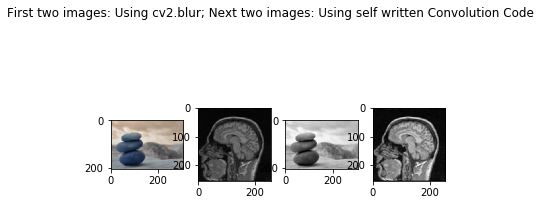

In [8]:
# 2.5 (i): Applying Box Filter
#cv2.blur() function is used to blur an image using normalized box filter

import convo

img1 = cv2.imread("images\\02.jpg", 1)
img2 = cv2.imread("images\\08.jpg", 1)

box_1= cv2.blur(img1, (5,5))
box_2= cv2.blur(img2, (5,5))

plt.suptitle ('First two images: Using cv2.blur; Next two images: Using self written Convolution Code ')

plt.subplot (1,4,1)
plt.imshow(box_1)    #1st Actual Image
plt.subplot (1,4,2) 
plt.imshow(box_2)

#Applying box filter using manual convolution, developed in part 2.4

img1_grey = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_grey = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

K= K= np.array([[1, 1, 1, 1, 1],[1, 1, 1, 1, 1],[1, 1, 1, 1, 1],[1, 1, 1, 1, 1],[1, 1, 1, 1, 1]])/25
manual_box1=convo.convolute(img1_grey, K) 
manual_box2=convo.convolute(img2_grey, K) 


plt.subplot (1,4,3)
plt.imshow(manual_box1, cmap='Greys_r')    #1st Actual Image
plt.subplot (1,4,4) 
plt.imshow(manual_box2,cmap='Greys_r')    #2nd Actual Image




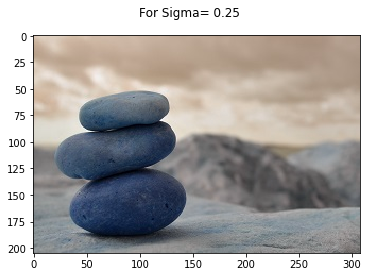

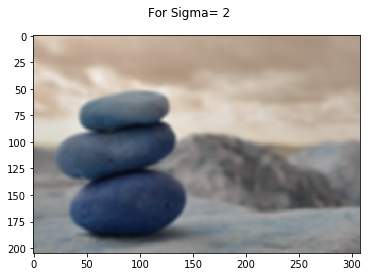

In [9]:
# 2.5 (2.): Applying Gaussian Filter Using Varying Sigma Values

img1 = cv2.imread("images\\02.jpg", 1)

gauss_image1= cv2.GaussianBlur(img1,(5,5),0.25)   #sigma= 0.25
gauss_image2= cv2.GaussianBlur(img1,(5,5),2)     #sigma= 2

plt.suptitle ('For Sigma= 0.25 ')
plt.imshow(gauss_image1)  
plt.figure()
plt.suptitle ('For Sigma= 2 ')
plt.imshow(gauss_image2)    


C:\Users\ssc\my work folder 1\noises.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  moon_salted_and_peppered[coords] = 255
C:\Users\ssc\my work folder 1\noises.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  moon_salted_and_peppered[coords] = 0


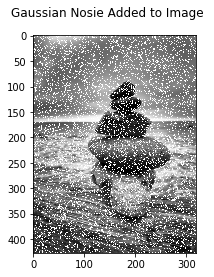

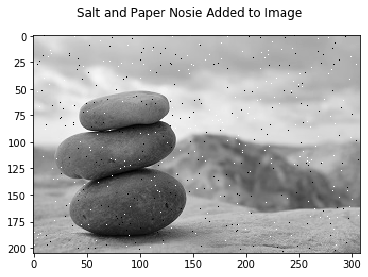

In [10]:
# 2.5 (3): Add Gaussian and Salt & Paper Noise to the Image
import noises

img = cv2.imread("images\\01.jpg", 0)
img1 = cv2.imread("images\\02.jpg", 0)


#adding Gaussian Noise
img_gauss=noises.gauus_nosie(img, 0, 1)
#adding Salt and Paper Noise
snp_img=noises.salt_pepper_noise(img1)


plt.suptitle ('Gaussian Nosie Added to Image ')
plt.imshow(img_gauss,  cmap='Greys_r')
plt.figure()
plt.suptitle ('Salt and Paper Nosie Added to Image ')
plt.imshow(snp_img,  cmap='Greys_r')


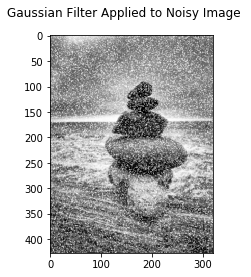

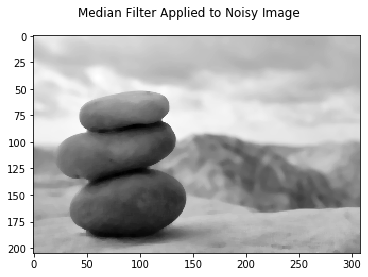

In [11]:
#2.5 (4): Apply Gaussian and Median Filters

Gauss_applied= cv2.GaussianBlur(img_gauss,(3,3),1) 
Median_applied=cv2.medianBlur(snp_img, 5);

plt.suptitle ('Gaussian Filter Applied to Noisy Image ')
plt.imshow(Gauss_applied,  cmap='Greys_r')
plt.figure()
plt.suptitle ('Median Filter Applied to Noisy Image ')
plt.imshow(Median_applied,  cmap='Greys_r')

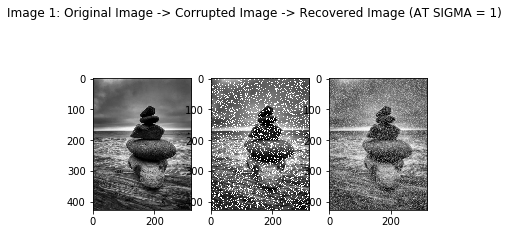

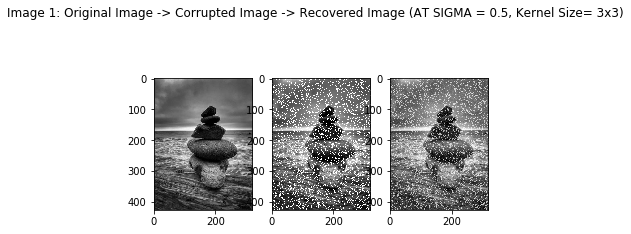

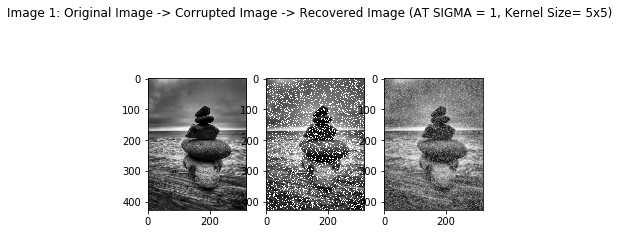

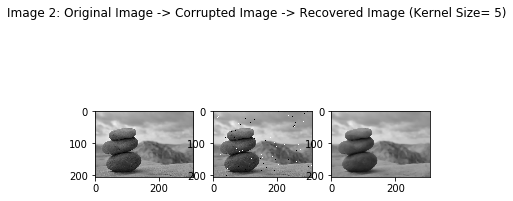

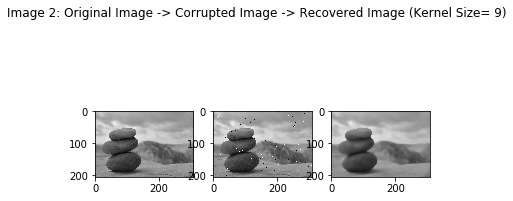

In [12]:
#2.5 (last): Comparison between original, corrupted and recovered image

plt.suptitle ('Image 1: Original Image -> Corrupted Image -> Recovered Image (AT SIGMA = 1)')
plt.subplot (1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))    #Original Image 1
plt.subplot (1,3,2)
plt.imshow(cv2.cvtColor(img_gauss, cv2.COLOR_BGR2RGB))    #Corrupted Image
plt.subplot (1,3,3)
plt.imshow(cv2.cvtColor(Gauss_applied, cv2.COLOR_BGR2RGB))    #Recovered Image

Gauss_applied_1= cv2.GaussianBlur(img_gauss,(3,3), 0.5) 
plt.figure()
plt.suptitle ('Image 1: Original Image -> Corrupted Image -> Recovered Image (AT SIGMA = 0.5, Kernel Size= 3x3)')
plt.subplot (1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))    #Original Image 1
plt.subplot (1,3,2)
plt.imshow(cv2.cvtColor(img_gauss, cv2.COLOR_BGR2RGB))    #Corrupted Image
plt.subplot (1,3,3)
plt.imshow(cv2.cvtColor(Gauss_applied_1, cv2.COLOR_BGR2RGB))    #Recovered Image

Gauss_applied_2= cv2.GaussianBlur(img_gauss,(5,5), 1) 
plt.figure()
plt.suptitle ('Image 1: Original Image -> Corrupted Image -> Recovered Image (AT SIGMA = 1, Kernel Size= 5x5)')
plt.subplot (1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))    #Original Image 1
plt.subplot (1,3,2)
plt.imshow(cv2.cvtColor(img_gauss, cv2.COLOR_BGR2RGB))    #Corrupted Image
plt.subplot (1,3,3)
plt.imshow(cv2.cvtColor(Gauss_applied_2, cv2.COLOR_BGR2RGB))    #Recovered Image


plt.figure()
plt.suptitle ('Image 2: Original Image -> Corrupted Image -> Recovered Image (Kernel Size= 5)')
plt.subplot (1,3,1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))  #Original Image 2
plt.subplot (1,3,2)
plt.imshow(cv2.cvtColor(snp_img, cv2.COLOR_BGR2RGB))    #Corrupted Image
plt.subplot (1,3,3)
plt.imshow(cv2.cvtColor(Median_applied, cv2.COLOR_BGR2RGB))    #Recovered Image

Median_applied_a=cv2.medianBlur(snp_img, 9);
plt.figure()
plt.suptitle ('Image 2: Original Image -> Corrupted Image -> Recovered Image (Kernel Size= 9)')
plt.subplot (1,3,1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))  #Original Image 2
plt.subplot (1,3,2)
plt.imshow(cv2.cvtColor(snp_img, cv2.COLOR_BGR2RGB))    #Corrupted Image
plt.subplot (1,3,3)
plt.imshow(cv2.cvtColor(Median_applied_a, cv2.COLOR_BGR2RGB))    #Recovered Image


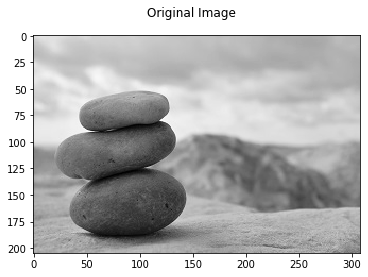

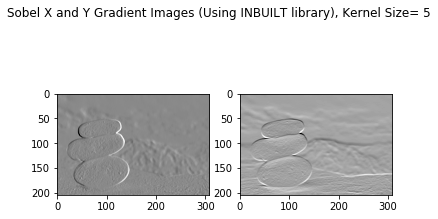

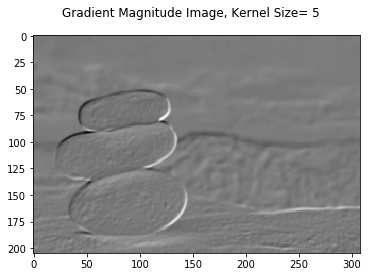

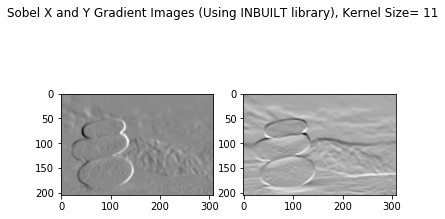

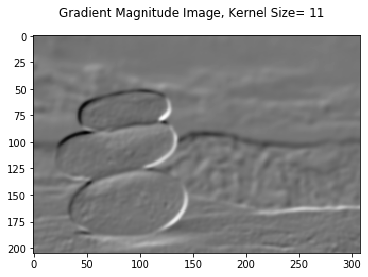

In [13]:
#2.6 (i): Sobel Filters

img1 = cv2.imread("images\\02.jpg", 0)

sobelx = cv2.Sobel(img1,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img1,cv2.CV_64F,0,1,ksize=5)

plt.suptitle ('Original Image')
plt.imshow(img1,  cmap='Greys_r')
plt.figure()
plt.suptitle ('Sobel X and Y Gradient Images (Using INBUILT library), Kernel Size= 5')
plt.subplot (1,2,1)
plt.imshow(sobelx,  cmap='Greys_r')
plt.subplot (1,2,2)
plt.imshow(sobely,  cmap='Greys_r')

grad_img= cv2.add(sobelx, sobely)
plt.figure()
plt.suptitle ('Gradient Magnitude Image, Kernel Size= 5')
plt.imshow(grad_img,  cmap='Greys_r')

sobelx1 = cv2.Sobel(img1,cv2.CV_64F,1,0,ksize=11)
sobely1 = cv2.Sobel(img1,cv2.CV_64F,0,1,ksize=11)


#repeat above steps and change kernel size
plt.figure()
plt.suptitle ('Sobel X and Y Gradient Images (Using INBUILT library), Kernel Size= 11')
plt.subplot (1,2,1)
plt.imshow(sobelx1,  cmap='Greys_r')
plt.subplot (1,2,2)
plt.imshow(sobely1,  cmap='Greys_r')

grad_img1= cv2.add(sobelx1, sobely1)
plt.figure()
plt.suptitle ('Gradient Magnitude Image, Kernel Size= 11')
plt.imshow(grad_img1,  cmap='Greys_r')

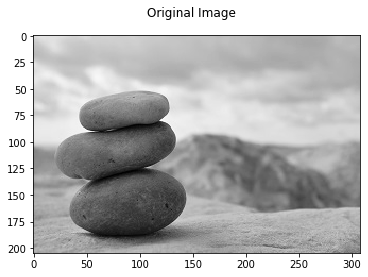

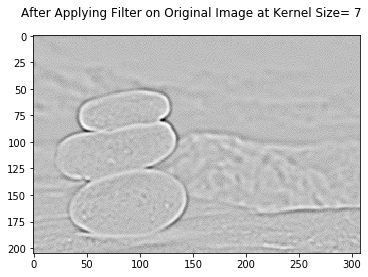

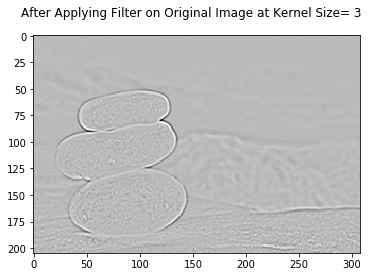

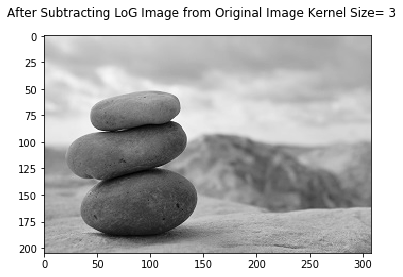

In [14]:
#2.6 (ii) Laplacian of Gaussian
#steps for LoG: Either apply Gaussian, then Laplacian OR directly apply LoG Kernel Convolution

img = cv2.imread("images\\02.jpg", 0)
blur = cv2.GaussianBlur(img,(7,7),0)
plt.suptitle ('Original Image')
plt.imshow(img, cmap='Greys_r')
plt.figure()

# Apply Laplacian operator in some higher datatype
laplacian = cv2.Laplacian(blur,cv2.CV_64F)
laplacian1 = laplacian/laplacian.max()

plt.suptitle ('After Applying Filter on Original Image at Kernel Size= 7')
plt.imshow(laplacian1, cmap='Greys_r')
plt.figure()
plt.suptitle ('After Subtracting LoG Image from Original Image Kernel Size= 7')
imgnew= img-laplacian1
plt.imshow(imgnew, cmap='Greys_r')

#changing filter Kernel Size to 3x3
blur_new = cv2.GaussianBlur(img,(3,3),0)
laplacian_new = cv2.Laplacian(blur_new,cv2.CV_64F)
laplacian1_new = laplacian_new/laplacian_new.max()


plt.suptitle ('After Applying Filter on Original Image at Kernel Size= 3')
plt.imshow(laplacian1_new, cmap='Greys_r')
plt.figure()
plt.suptitle ('After Subtracting LoG Image from Original Image Kernel Size= 3')
imgnew_1= img-laplacian1_new
plt.imshow(imgnew_1, cmap='Greys_r')

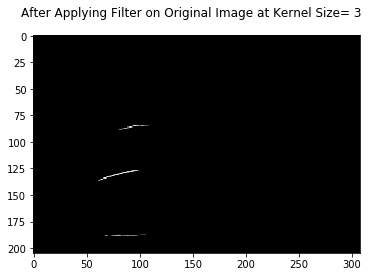

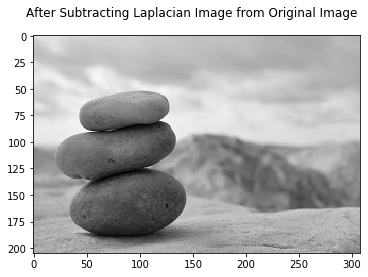

In [15]:
#2.6 (ii) using specific kernels
import convo
img = cv2.imread("images\\02.jpg", 0)

K1= np.array([[1,2,1],[2, 4, 2],[1,2,1]])

# blured=convo.convolute(img, K1)  #using code wriiten from scratch
blured= cv2.filter2D(img, -1, K1)

K2= np.array([[0,1,0],[1, -4, 1],[0, 1, 0]])
laplacian= cv2.filter2D(blured, -1, K2)
laplacian_normalized = laplacian/laplacian.max()

plt.suptitle ('After Applying Filter on Original Image at Kernel Size= 3')
plt.imshow(laplacian_normalized, cmap='Greys_r')

plt.figure()
new_original= img-laplacian_normalized
plt.suptitle ('After Subtracting Laplacian Image from Original Image')
plt.imshow(new_original, cmap='Greys_r')

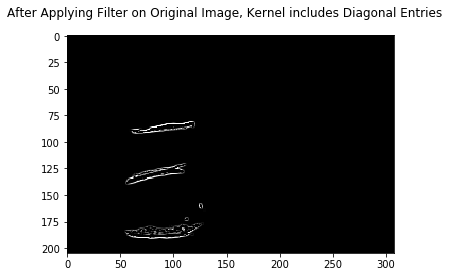

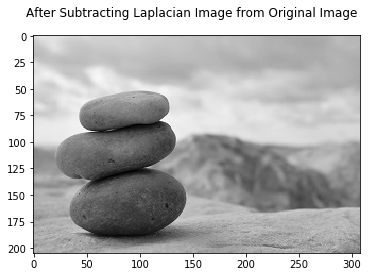

In [16]:
#2.6 (ii) using different kernels
import convo
img = cv2.imread("images\\02.jpg", 0)

K1= np.array([[0,1,0],[1, 2, 2],[0,1,0]])

# blured=convo.convolute(img, K1)  #using code wriiten from scratch
blured= cv2.filter2D(img, -1, K1)

K2= np.array([[-1,-1,-1],[-1, 8, -1],[-1, -1, -1]])
laplacian= cv2.filter2D(blured, -1, K2)
laplacian_normalized = laplacian/laplacian.max()

plt.suptitle ('After Applying Filter on Original Image, Kernel includes Diagonal Entries')
plt.imshow(laplacian_normalized, cmap='Greys_r')

plt.figure()
new_original= img-laplacian_normalized
plt.suptitle ('After Subtracting Laplacian Image from Original Image')
plt.imshow(new_original, cmap='Greys_r')

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

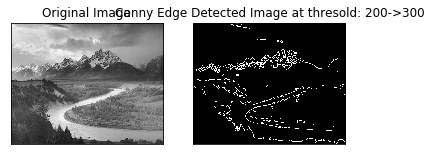

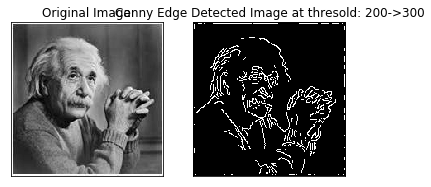

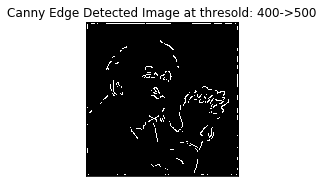

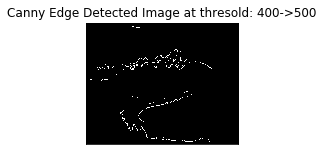

In [17]:
#2.6(iii): Canny Edge Detector

img = cv2.imread("images\\05.jpg", 0)
edges = cv2.Canny(img,200,300)    #200 and 300 are upper and lower thresholds

plt.subplot(1,2,1)
plt.imshow(img,cmap = 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(edges,cmap = 'gray')
plt.title('Canny Edge Detected Image at thresold: 200->300')
plt.xticks([]), plt.yticks([])

plt.figure()

img1= cv2.imread("images\\04.jpg", 0)
edges1 = cv2.Canny(img1,200,300)    #200 and 300 are upper and lower thresholds
plt.subplot(1,2,1)
plt.imshow(img1,cmap = 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(edges1,cmap = 'gray')
plt.title('Canny Edge Detected Image at thresold: 200->300')
plt.xticks([]), plt.yticks([])

plt.figure()
edges2 = cv2.Canny(img1,400,500)
plt.subplot(1,2,2)
plt.imshow(edges2,cmap = 'gray')
plt.title('Canny Edge Detected Image at thresold: 400->500')
plt.xticks([]), plt.yticks([])

plt.figure()
edges3 = cv2.Canny(img,400,500)
plt.subplot(1,2,2)
plt.imshow(edges3,cmap = 'gray')
plt.title('Canny Edge Detected Image at thresold: 400->500')
plt.xticks([]), plt.yticks([])

In [ ]:
# BONUS: Canny Edge detector on live video feed from webcam

cap = cv2.VideoCapture(0)
while True:
    ret, img = cap.read()
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 10, 70)
    ret, mask = cv2.threshold(canny, 70, 255, cv2.THRESH_BINARY)
    cv2.imshow('Video feed', mask)
    
    if cv2.waitKey(1) == 13:
        break
cap.release()
cv2.destroyAllWindows()

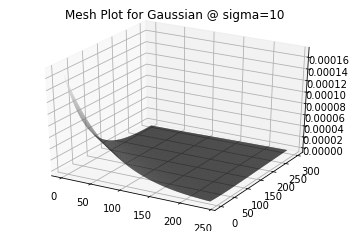

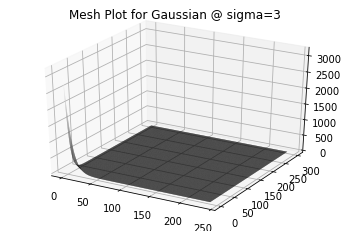

In [18]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cbook import get_sample_data
from matplotlib._png import read_png
img = cv2.imread("images\\05.jpg", 0)

def plot_helper(x, y, sigma):
    temp = (x * 2 + y * 2) / (2 * sigma ** 2)
    return -1 / (np.pi * sigma ** 4) * (1 - temp) * np.exp(-temp)

N = 100
half_N = N // 2

x, y = np.mgrid[0:img.shape[0], 0:img.shape[1]]

#z = np.sin(0.02*x)*np.sin(0.02*y)

z = -plot_helper(x - half_N, y - half_N, sigma=10)

# create the figure

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z,rstride=1, cstride=1, cmap=plt.cm.gray,
        linewidth=0)

# show it
plt.title ('Mesh Plot for Gaussian @ sigma=10')
plt.show()

#change sigma value
z = -plot_helper(x - half_N, y - half_N, sigma=3)

# create the figure
fig2 = plt.figure()
ax = fig2.gca(projection='3d')
ax.plot_surface(x, y, z,rstride=1, cstride=1, cmap=plt.cm.gray,
        linewidth=0)

# show it
plt.title ('Mesh Plot for Gaussian @ sigma=3')
plt.show()